#### Import Libraries

In [5]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from rutil import pystr
import pltflow.charts as flow

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Load datasets 

In [13]:
boston = (
    pd.read_csv("../toy_datasets/boston_housing.csv")
    .loc[:,["Id","YrSold","Neighborhood","OverallQual"]]

    
)
pystr(boston)

Pandas DataFrame 1460 obs. of 4 variables
$ Id                : int64        1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, ...
$ YrSold            : int64        2008, 2007, 2008, 2006, 2008, 2009, 2007, 2009, 2008, 2008, 2008, 2006, 200...
$ Neighborhood      : str          "CollgCr", "Veenker", "CollgCr", "Crawfor", "NoRidge", "Mitchel", "Somerst"...
$ OverallQual       : int64        7, 6, 7, 7, 8, 5, 8, 7, 7, 5, 5, 9, 5, 7, 6, 7, 6, 4, 5, 5, 8, 7, 8, 5, 5, ...


#### Stacked Bars

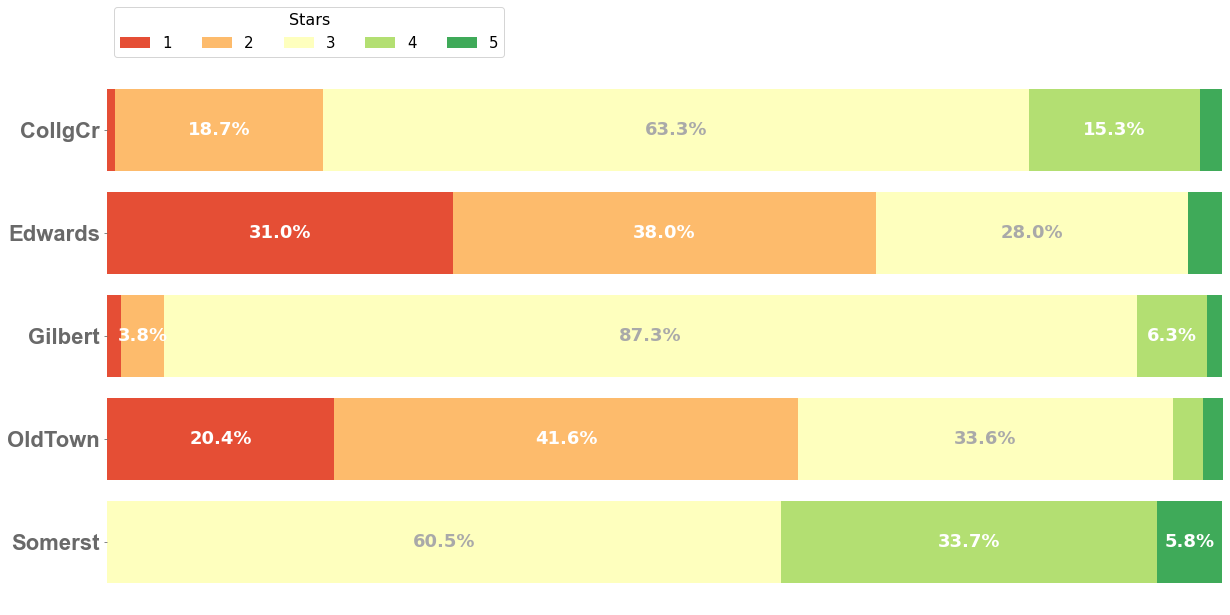

In [17]:
from pltflow.charts import stacked_bars

popular_neighborhoods = (
    boston
    .groupby('Neighborhood')
    .Id.count()
    .sort_values(ascending=False)
    .index
)[1:6]

df = (boston
    .loc[lambda df: df.Neighborhood.isin(popular_neighborhoods)]
    .assign(Stars = lambda df: df.OverallQual.replace({2:1,3:1,4:1,5:2,6:3,7:3,8:4,9:5,10:5}))
    
) 

stacked_bars(df,primary="Neighborhood",secondary="Stars");